# 0 Set up and Data Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
id_raw_df   =pd.read_csv("train_identity.csv")
id_trans_df =pd.read_csv("train_transaction.csv")

# 01 Data Prep and Exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
id_raw_df.shape

(144233, 41)

In [5]:
id_trans_df.shape

(590540, 394)

In [6]:
train_full_df = pd.merge(id_trans_df, id_raw_df, on='TransactionID', how='left')

In [7]:
train_full_df.shape

(590540, 434)

In [8]:
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.4990009144173126

## NA values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

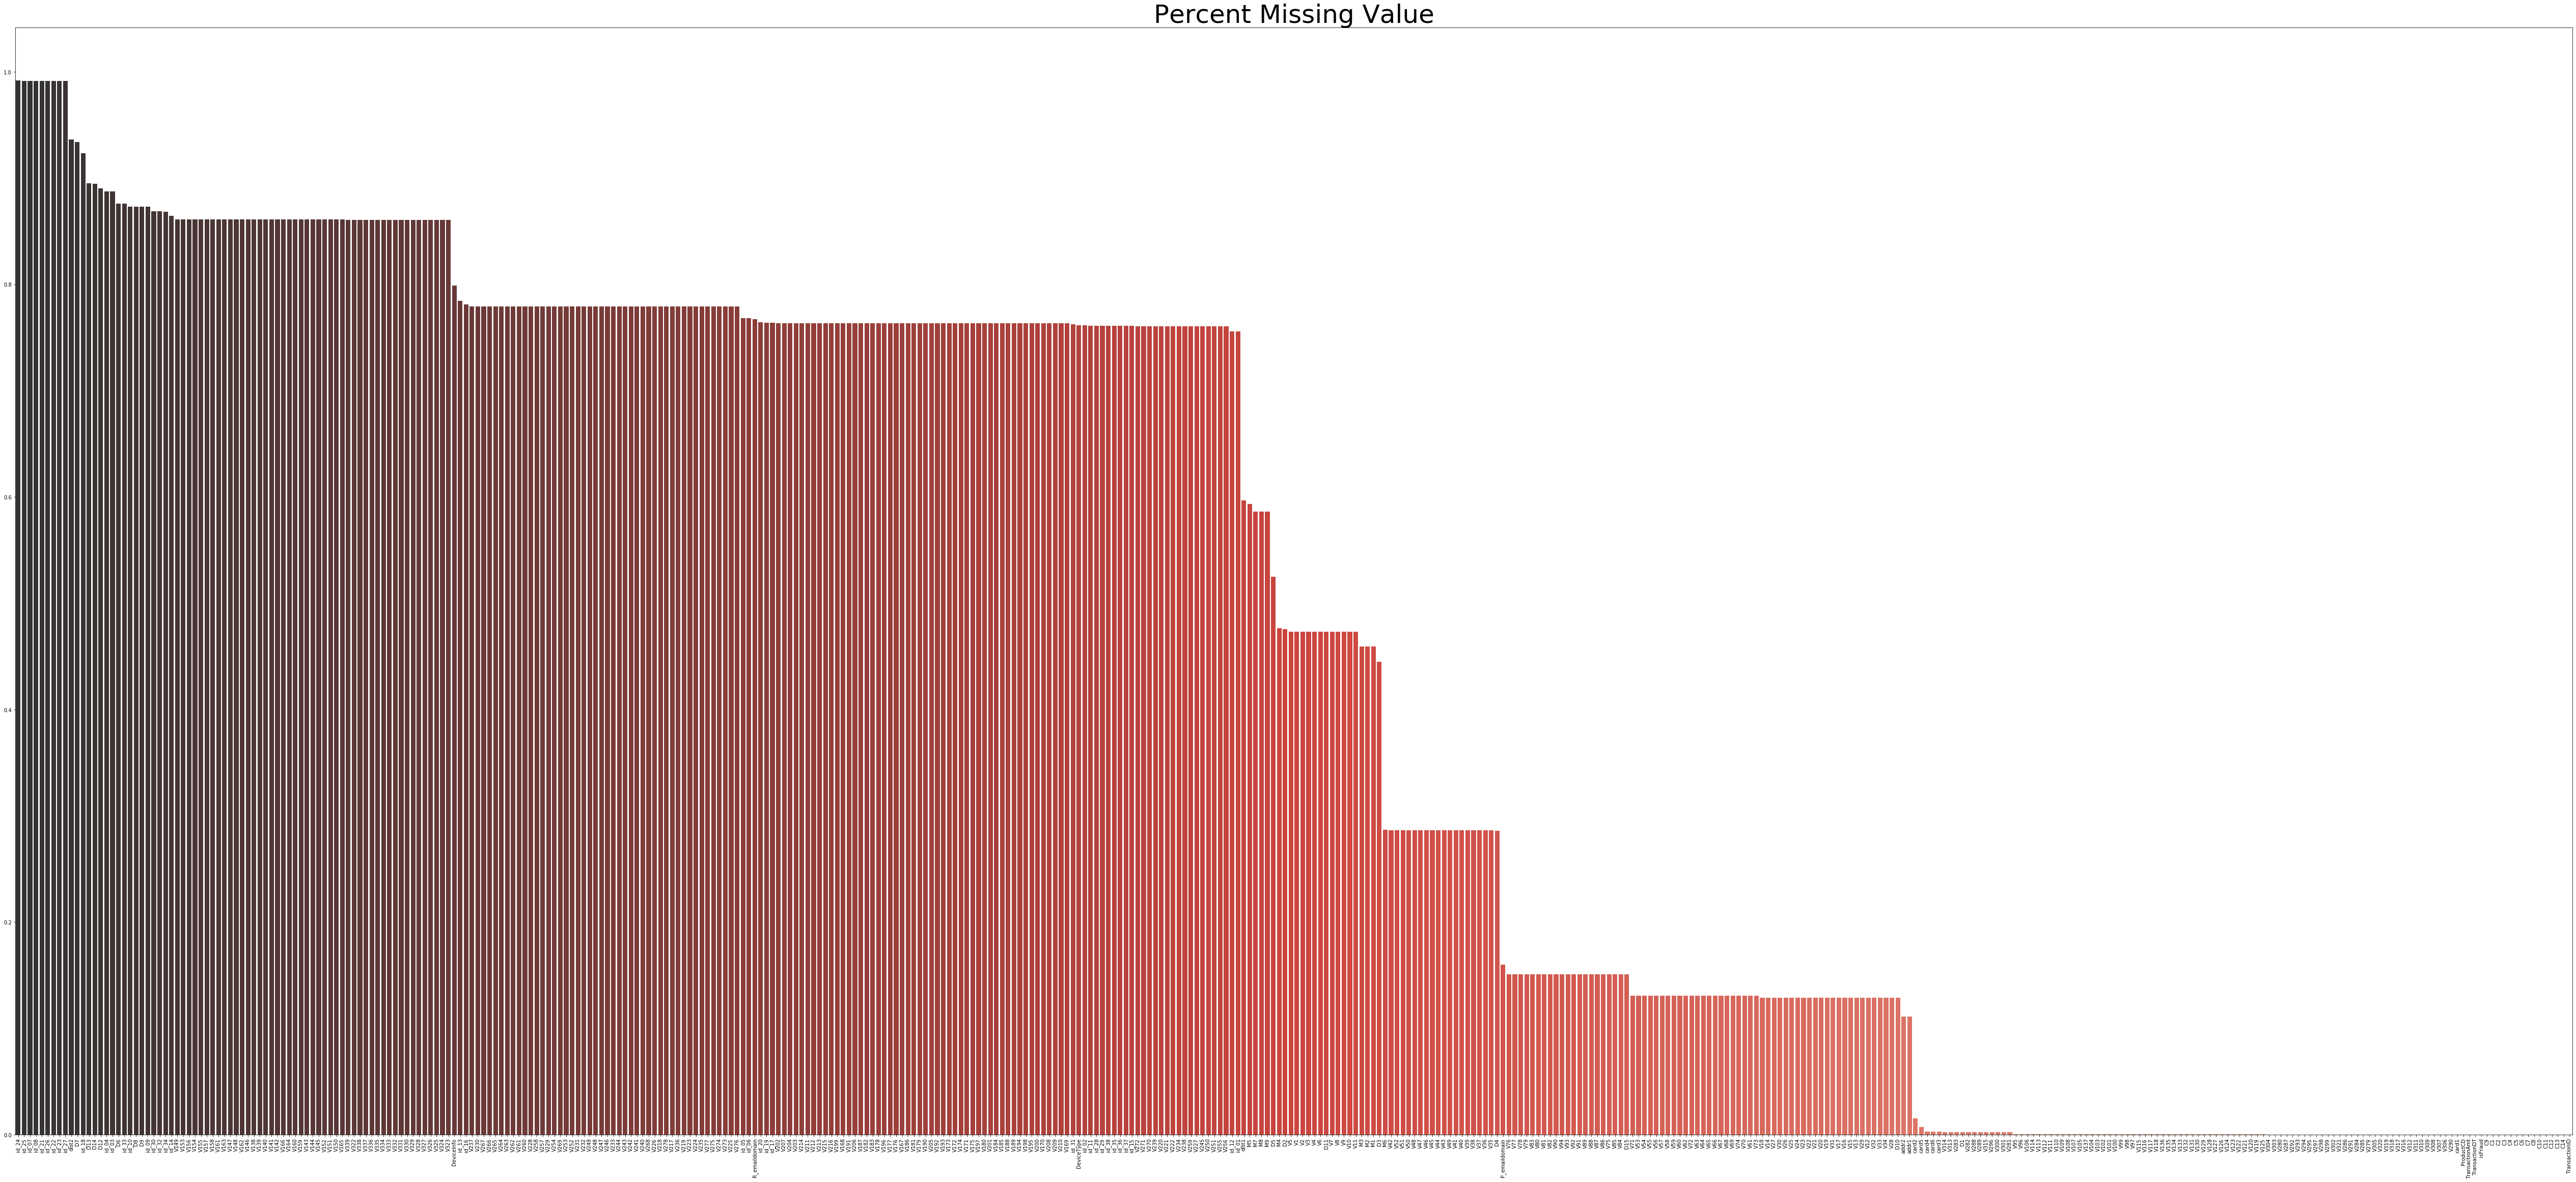

In [9]:
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

# 02 Data Prep

In [10]:
from sklearn.model_selection import train_test_split

### Handling NAs: 
**Strategies for dealing with NAs:**
* Drop data
* Impute/recode NAs

In [11]:
columns_def=pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [12]:
#Create column of percent columns, #higher is worst
columns_def["per"]=columns_def["na_count"]/len(train_full_df)

In [13]:
#cycle throungh various limit for percent Na per column
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [14]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [15]:
limit=0.10 #only columns w/ less 10% will remain

In [16]:
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 

train_full_df=train_full_df[train_full_df.columns.intersection(columns_final)]

## Dealing with Categorical Variables

In [17]:
#Show categorical variables
train_full_df[train_full_df.select_dtypes(include=['object']).columns]


,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [18]:
card6_dummy_df=pd.get_dummies(train_full_df["card6"])

In [19]:
train_full_df.shape

(590540, 112)

In [20]:
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [21]:
train_full_df=train_full_df._get_numeric_data()
train_full_df=train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.46278261170406

In [22]:
x_full_df=train_full_df.drop(["isFraud"],axis=1)
y_full_df=train_full_df["isFraud"]


In [23]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

# 03 Modeling

In [24]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [25]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(X_test, y_test)

0.9653168191804045

In [27]:
y_pred=lr.predict(X_test)

In [28]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,279020,279020
1,10025,10025
All,289045,289045


In [29]:
recall_score(y_test, y_pred)

0.0

In [30]:
accuracy_score(y_test, y_pred)

0.9653168191804045

In [31]:
recall_score(y_test, y_pred)

0.0

# 04 Conclusion and Next Steps

**Text steps:**
* Imbalance labels techniques 
* Drop less columns due to NAs
* Impune values for columns
* Try differnt algorithms
* Process and hot-code categorical variables

**Related Links:**
    [Kaggle IEE-CIS Fraud Competition](https://www.kaggle.com/c/ieee-fraud-detection/overview)